In [31]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# Load dataset
from sklearn.datasets import load_digits


In [33]:
mnist = load_digits()


In [34]:
type(mnist)

sklearn.utils._bunch.Bunch

In [35]:
# Let's inspect data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [36]:
# let's collect data
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [37]:
# Let's inspect labels
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [38]:
# Let's see how many different they are
set(mnist.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [39]:
mnist.images[0] # this another ways of seeing data

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

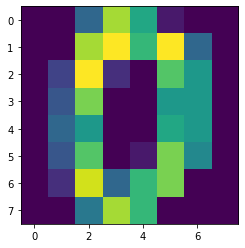

In [40]:
# plot image
plt.imshow(mnist.images[0])

In [41]:
mnist.data.max()

16.0

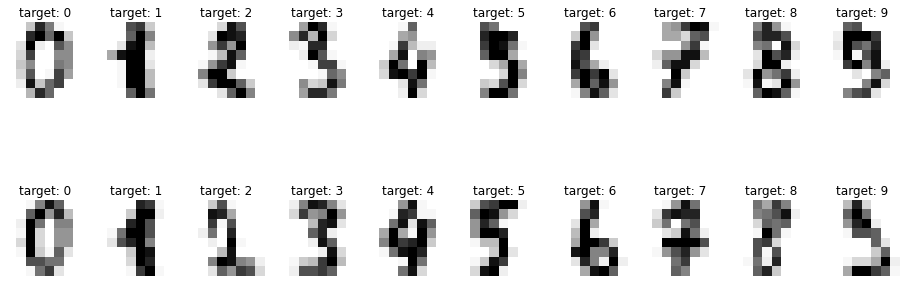

In [42]:
# Let's plot different images
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
# grey 0 is white, 255 is black 
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='Greys');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

# more color maps  here https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps

In [43]:
# Load with tensorflow keras
from tensorflow.keras.datasets import mnist


In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28), X_test shape: (10000, 28, 28)


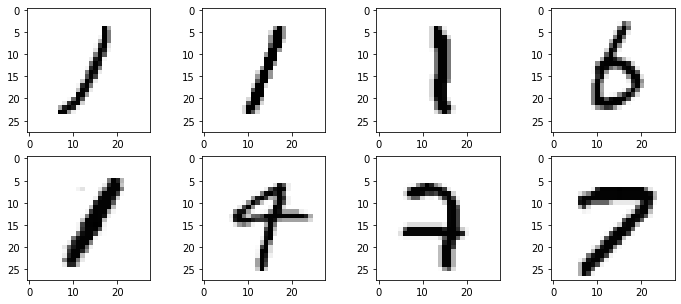

In [45]:
# Plotting random images from dataset
import random
plt.figure(figsize = (12,5))
for i in range(8):
    ind = random.randint(0, len(X_train))
    plt.subplot(240+1+i)
    plt.imshow(X_train[ind], cmap="Greys")

In [46]:
# if we pick a random image
pd.DataFrame(X_train[0]).max().max() 
# We have values between 0 and 255

255

In [47]:
X_train.shape

(60000, 28, 28)

# The first step is to scale the data set. As first attempt let's do a min max scaller

In [48]:
X_train = X_train / 255
X_test = X_test / 255

In [49]:
import tensorflow as tf

In [50]:
# Depending on the Loss function you may need different type of labels. Lets assume for now, that one hot encoding is what we need
# Convert labels to one-hot vectors
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


In [51]:
# lets see how it looks
print(y_train[0]) # this is number five

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


# Model arquitecture

In [52]:
X_train[0].shape

(28, 28)

In [53]:
# we need to reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]**2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]**2)

In [54]:
from tensorflow.keras.layers import Dense
model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# model Optimizer

In [55]:
# compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)


# Compile model after defining loss function

In [56]:
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

In [57]:
y_train[0].shape

TensorShape([10])

In [58]:
# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=32, validation_split=0.1)

Epoch 1/500
3/3 [==============================] - 0s 72ms/step - loss: 2.3893 - accuracy: 0.0667 - val_loss: 2.2554 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 22ms/step - loss: 2.2732 - accuracy: 0.1444 - val_loss: 2.1215 - val_accuracy: 0.2000
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 2.1136 - accuracy: 0.2889 - val_loss: 1.9532 - val_accuracy: 0.4000
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 1.9478 - accuracy: 0.4333 - val_loss: 1.7350 - val_accuracy: 0.6000
Epoch 5/500
3/3 [==============================] - 0s 15ms/step - loss: 1.7658 - accuracy: 0.5333 - val_loss: 1.5060 - val_accuracy: 0.7000
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 1.5673 - accuracy: 0.6778 - val_loss: 1.2826 - val_accuracy: 0.9000
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 1.3737 - accuracy: 0.7889 - val_loss: 1.0813 - val_accuracy: 0.9000
Epoch 8/500
3/3 

3/3 [==============================] - 0s 19ms/step - loss: 0.0309 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 60/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 61/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 62/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 63/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 64/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 65/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 1.0000
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 19ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 118/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 1.0000
Epoch 119/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 120/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 121/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 122/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 123/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 124/500
3/3 [=

Epoch 175/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 176/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 177/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 178/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 179/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 1.0000
Epoch 180/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 181/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 234/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 235/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 236/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 237/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 238/500
3/3 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 239/500
3/3 [==============================] - 0s 33ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 

Epoch 291/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 292/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 293/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 294/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 295/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 296/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 297/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 

Epoch 349/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 350/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 351/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 352/500
3/3 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 353/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 354/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 355/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 

Epoch 407/500
3/3 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 408/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 409/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 410/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 411/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 412/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 413/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 

Epoch 465/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 466/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 467/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 468/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 469/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 470/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 471/500
3/3 [==============================] - 0s 19ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 

# Evaluate the model

In [59]:
...
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 739us/step - loss: 1.2811 - accuracy: 0.6844


# make a prediction

In [60]:
# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 634us/step


In [61]:
import random 
number = random.randint(0,10)
print(f"I predicted {np.argmax(yhat[number])} the real anwser should be {np.argmax(y_test[number])} ")

I predicted 0 the real anwser should be 0 


# Viz

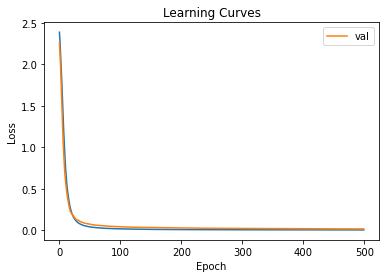

In [62]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [63]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 28)                21980     
                                                                 
 dense_6 (Dense)             (None, 10)                290       
                                                                 
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


# How to Get Better Model Performance

## How to Reduce Overfitting With Dropout

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

In [64]:
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=32, validation_split=0.1, verbose=0)

# make a prediction
yhat = model.predict(X_test)


313/313 [==============================] - 0s 556us/step


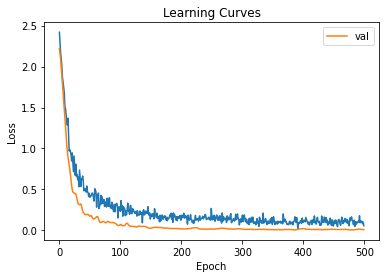

In [65]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [66]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 729us/step - loss: 1.8950 - accuracy: 0.6499


### How to Accelerate Training With Batch Normalization

The scale and distribution of inputs to a layer can greatly impact how easy or quickly that layer can be trained.

This is generally why it is a good idea to scale input data prior to modeling it with a neural network model.

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [67]:
from tensorflow.keras.layers import BatchNormalization
model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=32, validation_split=0.1, verbose=0)

# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 682us/step


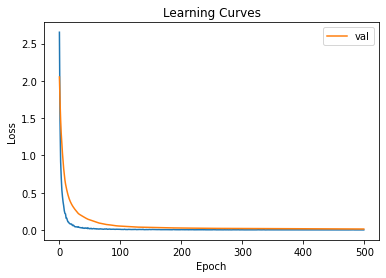

In [68]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [69]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.3003 - accuracy: 0.6607


## How to Halt Training at the Right Time With Early Stopping

Too little training and the model is underfit; too much training and the model overfits the training dataset. Both cases result in a model that is less effective than it could be.

One approach to solving this problem is to use early stopping. This involves monitoring the loss on the training dataset and a validation dataset (a subset of the training set not used to fit the model). As soon as loss for the validation set starts to show signs of overfitting, the training process can be stopped.

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01) # Number of epochs with no improvement after which training will be stopped.


# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=32, validation_split=0.1, verbose=0, callbacks=[es])

# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 702us/step


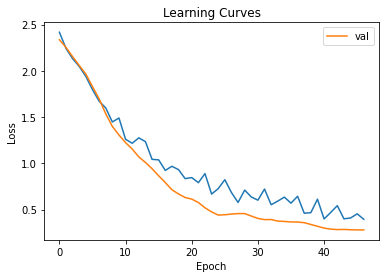

In [71]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [72]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 783us/step - loss: 1.1971 - accuracy: 0.6404


## Let's try adam

In [73]:
model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01) # Number of epochs with no improvement after which training will be stopped.


# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=32, validation_split=0.1, verbose=0, callbacks=[es])

# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 772us/step


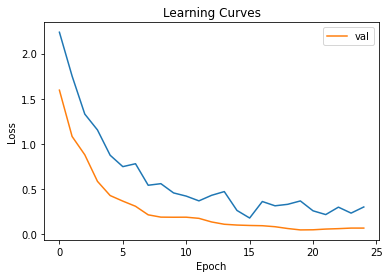

In [74]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [75]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 713us/step - loss: 1.7324 - accuracy: 0.6480


## Let's try a bigger batch size

In [76]:
model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01) # Number of epochs with no improvement after which training will be stopped.


# fit the model
res = model.fit(X_train[:100], y_train[:100], epochs=500, batch_size=50, validation_split=0.1, verbose=0, callbacks=[es])

# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 740us/step


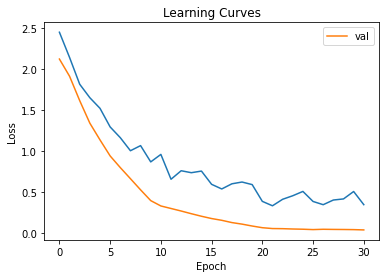

In [77]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [78]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 730us/step - loss: 1.4469 - accuracy: 0.6511


# Let's try more data

In [79]:
model = tf.keras.models.Sequential()
model.add(Dense(28, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01) # Number of epochs with no improvement after which training will be stopped.


# fit the model
res = model.fit(X_train[:10000], y_train[:10000], epochs=500, batch_size=50, validation_split=0.1, verbose=0, callbacks=[es])

# make a prediction
yhat = model.predict(X_test)

313/313 [==============================] - 0s 578us/step


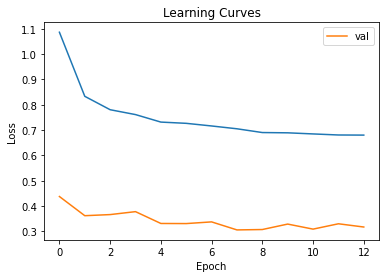

In [80]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [81]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 711us/step - loss: 0.3730 - accuracy: 0.8994


# Let's try  a more complex model

In [85]:
model = tf.keras.models.Sequential()
model.add(Dense(392, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(196, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(BatchNormalization()) # 50 % dropout
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5)) # 50 % dropout
model.add(Dense(10, activation='sigmoid'))
# compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# configure early stopping

# fit the model
res = model.fit(X_train[:10000], y_train[:10000], epochs=100, batch_size=50, validation_split=0.1)

# make a prediction
yhat = model.predict(X_test)

Epoch 1/100
180/180 [==============================] - 2s 8ms/step - loss: 0.9297 - accuracy: 0.6959 - val_loss: 0.5357 - val_accuracy: 0.8360
Epoch 2/100
 84/180 [=============>................] - ETA: 0s - loss: 0.4982 - accuracy: 0.8505

KeyboardInterrupt: 

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(res.epoch, res.history["loss"])
plt.plot(res.history['val_loss'], label='val')
plt.legend()

In [ ]:
# evaluate the model
loss = model.evaluate(X_test, y_test)

In [86]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 392)               307720    
                                                                 
 dense_28 (Dense)            (None, 196)               77028     
                                                                 
 dense_29 (Dense)            (None, 49)                9653      
                                                                 
 batch_normalization_2 (Batc  (None, 49)               196       
 hNormalization)                                                 
                                                                 
 dense_30 (Dense)            (None, 28)                1400      
                                                                 
 dropout_9 (Dropout)         (None, 28)                0         
                                                     